In [36]:
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

wfs = {
    "jaxnimage2": {"jax": True, "slater_kws": {"tol": 0, "nimages": 2}},
    "jaxnimage1": {"jax": True, "slater_kws": {"tol": 0, "nimages": 1}},
    "nonjax": {"jax": False, "slater_kws": {"tol": 0}},
}

alldata = []
for N in [10, 20]:
    for wf_name, wf_params in wfs.items():
        hdf_file = f"performance_{wf_name}_{N}.hdf5"
        if not os.path.exists(hdf_file):
            print(f"File {hdf_file} does not exist. Skipping.")
            continue

        with h5py.File(hdf_file, "r") as f:
            data = {key: f[key][()] for key in f.keys()}
        data["N"] = N
        data["wf_name"] = wf_name

        alldata.append(data)

df = pd.DataFrame(alldata)
df

,N,laplacian time per walker,laplacian_values,nconfigs,new_ecp time per walker,new_ecp_values,old_ecp time per walker,old_ecp_values,recompute time per walker,recompute_values,wf_name
0,10,1.696980,"[-2.271837523567471, -2.841007973143894, 13.06...",10,7.477683,"[-89.32813669577646, 55.703927811976634, 10.69...",3.655784,"[-89.32698627120084, 55.79485825404371, 10.514...",1.059798,"[-251.50773494312355, -255.56185639870486, -24...",jaxnimage2
1,10,0.343732,"[-2.2722673256625705, -2.840836155499356, 13.2...",10,1.552604,"[-89.21642560773266, 55.726773241731564, 10.72...",0.827655,"[-89.36549604768463, 55.718259285261624, 10.62...",0.224519,"[-251.50556395720756, -255.5610117535871, -248...",jaxnimage1
2,10,0.168616,"[-2.2718375631455605, -2.8410078035790436, 13....",10,0.277584,"[-89.36873825271715, 55.75431497230154, 10.685...",0.180088,"[-89.48725655832467, 55.715527699497585, 10.47...",0.032356,"[-251.50773491153558, -255.56185637257298, -24...",nonjax
3,20,1.691664,"[-2.2522682332847768, -7.635239674270041, -1.3...",20,7.434261,"[27.93728269013915, -86.1453467184197, 32.7311...",5.465305,"[27.906838320669294, -86.33749931355001, 32.78...",1.067827,"[-252.27468920845655, -252.96151496552392, -24...",jaxnimage2
4,20,0.357374,"[-2.2504223051399666, -7.638787331062584, -1.3...",20,1.543029,"[27.859670712536502, -85.93892024784382, 32.72...",1.117143,"[27.695531330993038, -85.84759713781347, 32.81...",0.218577,"[-252.27122057169606, -252.9585734215065, -244...",jaxnimage1
5,20,0.111163,"[-2.252268209629273, -7.635239113853111, -1.32...",20,0.209027,"[27.862188002993864, -86.23789693138862, 32.71...",0.126117,"[27.99519766749274, -86.27092267658539, 32.709...",0.033006,"[-252.27468911368962, -252.96151493418344, -24...",nonjax


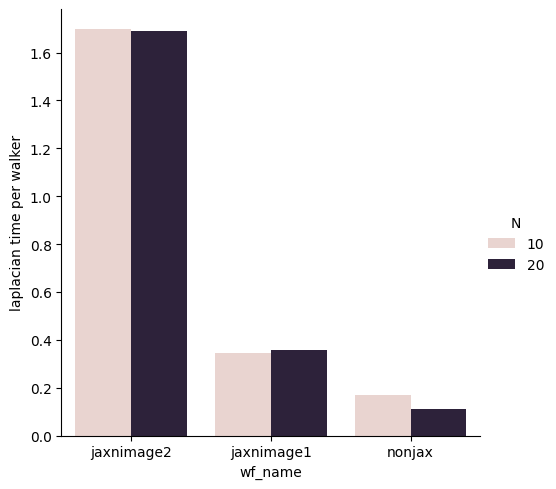

In [37]:
sns.catplot(data=df, x="wf_name", y="laplacian time per walker", hue="N", kind="bar")

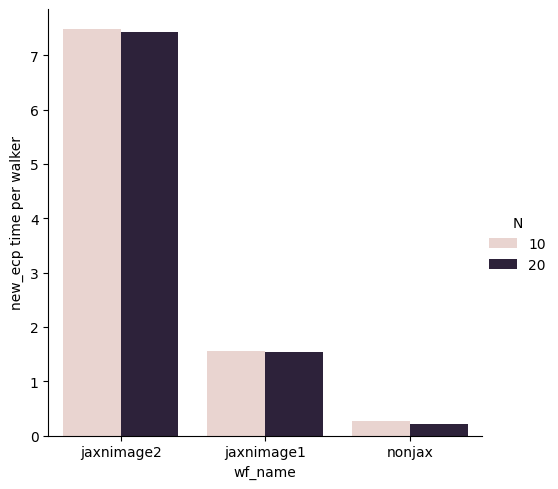

In [38]:
sns.catplot(data=df, x="wf_name", y="new_ecp time per walker", hue="N", kind="bar")

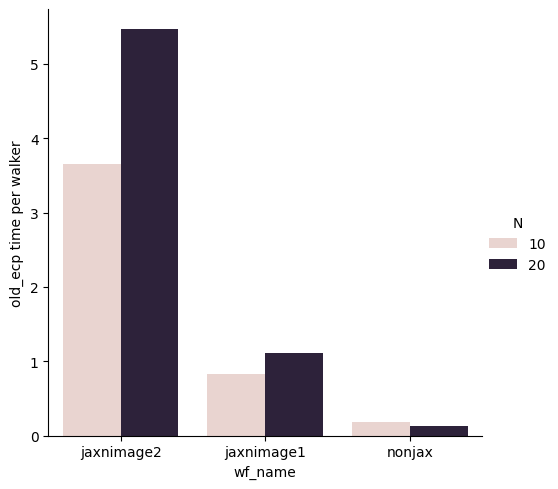

In [39]:
sns.catplot(data=df, x="wf_name", y="old_ecp time per walker", hue="N", kind="bar")